In [1]:
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import CustomClass
from func_file import train_model, test_model, collate_fn

데이터 출처<hr>
- https://www.kaggle.com/datasets/backalla/words-mnist
- https://tc11.cvc.uab.es/datasets/
- https://www.kaggle.com/datasets/hnthnt/jp-font-image-dataset-02?select=00000083.jpg
- https://www.kaggle.com/datasets/ngkinwang/iam-dataset
- https://www.kaggle.com/datasets/ravi02516/20-ocr-dataset
- https://www.kaggle.com/datasets/frlemarchand/synthetic-kmnist-pages?select=synthetic_kmnist_pages.csv

In [2]:
random.seed(56)

In [3]:
train_data_path = './data/archive (3)/new_test/new_train'
test_data_path = './data/archive (3)/new_test/new_test'

In [4]:
transformer = v2.Compose(transforms=
                                 [transforms.ToTensor(),
                                  v2.Resize(size=[64,128])
                                  ])

In [5]:
train_name_list = random.sample(os.listdir(train_data_path), 15000)
test_name_list = os.listdir(test_data_path)

In [6]:
train_img_list = []
test_img_list = []
train_label = []
test_label = []

In [7]:
for img_name in train_name_list:
    img = Image.open(train_data_path+'/'+img_name)
    train_img_list.append(transformer(img).numpy())
    train_label.append(img_name.split('.jpg')[0])
    img.close()

for img_name in test_name_list:
    img = Image.open(test_data_path+'/'+img_name)
    test_img_list.append(transformer(img).numpy())
    test_label.append(img_name.split('.jpg')[0])
    img.close()

In [8]:
# train_img_list[0]

In [9]:
trainTS = torch.tensor(train_img_list)
testTS = torch.tensor(test_img_list)

C:\Users\낙지들의왕\AppData\Local\Temp\ipykernel_24820\278347032.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  trainTS = torch.tensor(train_img_list)


In [10]:
trainTS.shape, testTS.shape

(torch.Size([15000, 3, 64, 128]), torch.Size([1472, 3, 64, 128]))

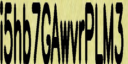

In [11]:
tf = transforms.ToPILImage()
sample = tf(trainTS[12])
sample

In [12]:
eng_only_vocab = CustomClass.Vocab()
eng_only_vocab.resetCode()

In [13]:
trainDS = CustomClass.CustomDataset(trainTS, np.array(train_label), eng_only_vocab)
testDS1 = CustomClass.CustomDataset(testTS, np.array(test_label), eng_only_vocab)

In [14]:
check_id = 1200
trainDS[check_id][1], train_label[check_id], len(trainDS[check_id][1]), len(test_label[check_id])

(array([15, 55, 41, 58, 62, 39]), '.vhyCf', 6, 15)

In [15]:
torch.random.manual_seed(100)
gen = torch.Generator().manual_seed(100)

In [16]:
trainDS1, validDS1 = random_split(trainDS, [0.9, 0.1], generator=gen)

In [17]:
torch.cuda.is_available()

True

In [18]:
# for d in trainDS1:
#     print(d[1].shape)

In [19]:
# trainDS1[0], trainDS1[0][0].shape, trainDS1[0][1].shape

In [20]:
BATCH_SIZE = 100
trainDL1 = DataLoader(trainDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
validDL1 = DataLoader(validDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
testDL1 = DataLoader(testDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, drop_last=True)

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load('./data/backup_model/bbbest_model100.pkl')
optim = torch.optim.Adam(model.parameters())
schd = torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

In [22]:
result = train_model(model, optim, trainDL1, validDL1, device, epochs=100, schd=schd)

Proceeding.......
Epoch [    1 /   100] ------
train cost = 1.7651617527008057, valid cost = 4.694690227508545
Proceeding.......
Epoch [    2 /   100] ------
train cost = 1.7253097295761108, valid cost = 4.475507736206055
Proceeding.......
Epoch [    3 /   100] ------
train cost = 1.915759801864624, valid cost = 4.423345565795898
Proceeding.......
Epoch [    4 /   100] ------
train cost = 1.7069817781448364, valid cost = 4.38610315322876
Proceeding.......
Epoch [    5 /   100] ------
train cost = 1.708423137664795, valid cost = 4.7989678382873535
Proceeding.......
Epoch [    6 /   100] ------
train cost = 1.6390423774719238, valid cost = 4.980526447296143
Proceeding.......
Epoch [    7 /   100] ------
train cost = 1.6138116121292114, valid cost = 5.122561931610107
Proceeding.......
Epoch [    8 /   100] ------
train cost = 1.4270226955413818, valid cost = 5.300695896148682
Proceeding.......
Epoch [    9 /   100] ------
train cost = 1.3651195764541626, valid cost = 5.454405307769775
Pro

In [22]:
torch.save(model, './bbbest_model200.pkl')

In [24]:
testModel1 = torch.load('./bbbest_model200.pkl')

In [ ]:
# train_costs = [res.cpu().item() for res in result[0]]
# valid_costs = [res.cpu().item() for res in result[1]]
# 
# plt.plot(train_costs)
# plt.plot(valid_costs)
# plt.legend(['train', 'valid'])
# plt.grid(alpha=0.35)
# plt.xlabel('Epochs')
# plt.ylabel('Cost')
# plt.show()

In [25]:
test_result = test_model(testModel1, testDL1, device)

Proceeding....Trial   0 --- 
test cost = 1.8939456939697266
Trial   1 --- 
test cost = 1.7803099155426025
Trial   2 --- 
test cost = 1.7295544147491455
Trial   3 --- 
test cost = 1.7865819931030273
Trial   4 --- 
test cost = 1.597320795059204
Trial   5 --- 
test cost = 1.7567977905273438
Trial   6 --- 
test cost = 1.8789336681365967
Trial   7 --- 
test cost = 1.7513123750686646
Trial   8 --- 
test cost = 1.7931658029556274
Trial   9 --- 
test cost = 1.8248494863510132
.Trial  10 --- 
test cost = 1.8981451988220215
Trial  11 --- 
test cost = 1.7208678722381592
Trial  12 --- 
test cost = 2.0672380924224854
Trial  13 --- 
test cost = 1.8862444162368774


In [26]:
sum(test_result) / len(test_result)

1.8118048225130354

In [28]:
# check_id = 2000
# 
# imgTS = torch.FloatTensor(test_img_list[check_id]).unsqueeze(dim=0).to(device)
# 
# testModel1.eval()
# 
# pre1 = testModel1(imgTS)
# 
# print(torch.argmax(pre1, dim=-1)[0])
# 
# for id in torch.argmax(pre1, dim=-1)[0]:
#     letter = eng_only_vocab.decoder[id.item()]
#     if letter != '<PAD>':
#         print(letter, end=', ')
#     
# print(f'\n{test_label[check_id]}')
# print(tf(trainTS[check_id]).show())